In [5]:
import pandas as pd
import numpy as np
from sklearn import manifold
from sklearn.metrics import euclidean_distances
seed = np.random.RandomState(seed=2050)
import itertools as it 
import matplotlib.pyplot as plt
# from matplotlib.colormaps import get_cmap
from matplotlib import cm
from matplotlib.colors import Normalize

In [6]:
def reduce(grid):
    similarities = euclidean_distances(grid)

    dim = 2
    max_iter = 6000
    eps = 1e-9
    mds = manifold.MDS(n_components=dim, 
                       max_iter=max_iter, 
                       eps=eps, 
                       random_state=seed,
                       dissimilarity='precomputed'
                       )
    print('Similarities have shape {}'.format(np.shape(similarities)))
    mds.fit(similarities)
    pos = mds.embedding_

    return pos

In [7]:
n = 10
inary = 5
el = np.array([i/n for i in range(n+1)])
grid = np.array([x for x in it.product(el, repeat=inary) if np.isclose(np.sum(x),1)])
corners = np.eye(inary)
pos_grid = reduce(grid)

Similarities have shape (1001, 1001)


In [8]:
from scipy.spatial.distance import cdist

def look_up_grid(x):
    dist = cdist(x.reshape(1,-1), grid)
    idx = np.argmin(dist)

    return pos_grid[idx,:]

corners = np.eye(inary)
pos_corners = np.asarray([look_up_grid(ci) for ci in corners])
pos_zero = look_up_grid(np.zeros(inary))

## Load Data

In [9]:
def load_volumes(path):
    data = pd.read_csv(path).values
    PVP = (data[:,0]).reshape(-1,1)
    TA = (data[:,2]).reshape(-1,1)
    AA = (data[:,3]).reshape(-1,1)
    SN = (data[:,4]).reshape(-1,1)
    Seeds = (data[:,5]).reshape(-1,1) #Use mM as units
    Water = (data[:,1]).reshape(-1,1)
    x = np.hstack((PVP, TA, AA, SN, Seeds))
    return x, Water

In [11]:
t = np.load('../Fast Spectroscopic Exploration/Spectra/classification_5.npy')
axis_names = np.asarray(['PVP', 'TA', 'AA', 'SN', 'Seeds'])
x1, Water1 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_0.csv')
x2, Water2 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_1.csv')
x3, Water3 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_2.csv')
x4, Water4 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_3.csv')
x5, Water5 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_4.csv')
x6, Water6 = load_volumes('../Fast Spectroscopic Exploration/Volumes/Volumes_5.csv')
X = np.vstack((x1,x2, x3, x4, x5, x6))
x = X.copy()
t1 = t[0:48]
t2 = t[48:96]
t3 = t[96:144]
t4 = t[144:192]
t5 = t[192:240]
t6 = t[240:]

## Create 5D Plot

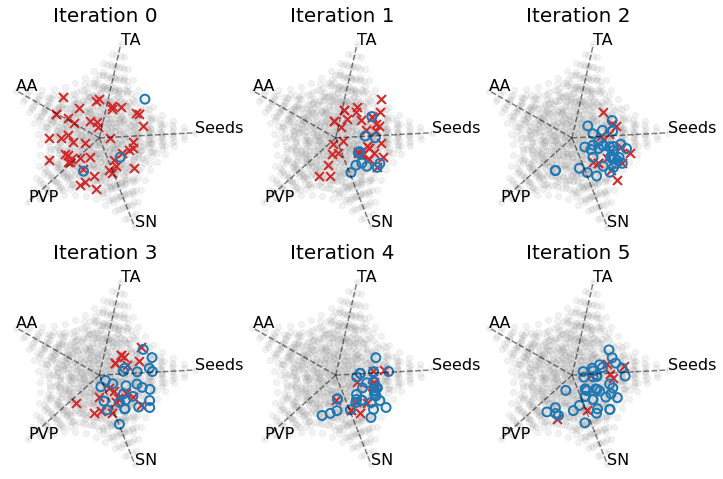

In [17]:
def plot(x, water, t, ax):
        x_norm = 2.5*(x/water)
        pos_data = np.asarray([look_up_grid(xi) for xi in x_norm])    
        ax.scatter(pos_grid[:,0],pos_grid[:,1], 
                color='grey', alpha=0.1)
        ax.scatter(pos_data[t==0,0], pos_data[t==0,1], 
                color='tab:red', s = 80, alpha=1, marker='x', label = 'Not Plates', linewidth=2)
        ax.scatter(pos_data[t==1,0], pos_data[t==1,1], 
                color='tab:blue', s = 80, alpha=1, marker='o', facecolors='none', label = 'Plates', linewidth=2)   

        for i, l in enumerate(axis_names):
                line = np.vstack((pos_zero, pos_corners[i,:]))
                ax.plot(line[:,0], line[:,1], color='k', alpha=0.5, linestyle='dashed')
                ax.text(pos_corners[i,0], pos_corners[i,1], l,
                        color='k', fontsize=16)
        ax.axis('equal')
        ax.axis('off')

        return 

fig, axs = plt.subplots(2, 3, figsize=(4*3, 4*2))
axs = axs.flatten()
plot(x1, Water1, t1, axs[0])
plot(x2, Water2, t2, axs[1])
plot(x3, Water3, t3, axs[2])
plot(x4, Water4, t4, axs[3])
plot(x5, Water5, t5, axs[4])
plot(x6, Water6, t6, axs[5])
for i, ax in enumerate(axs):
    ax.set_title('Iteration %d'%i, fontsize=20, pad = 15)
#plt.savefig('../../Figures/230421/5d_plot_shapes_paper.jpg', dpi = 600, bbox_inches="tight")
plt.show()